## Reading Input

In [5]:
import pandas as pd
from proj_utils.input_interpreter import format_input

In [6]:
customer_df = pd.read_excel('data/2_detail_table_customers.xls')
deposit_df = pd.read_excel('data/4_detail_table_depots.xls')
routes = customer_df['ROUTE_ID'].unique()

In [7]:
print(routes)

[2946091 2922001 2939484 2958047 2970877 2990001 3005971 2604001 3016355
 3027038 3044702]


In [8]:
from proj_utils.fake_input_generator import generator
from proj_utils.input_interpreter import format_input

import matplotlib.pyplot as plt

from VHR.greedy_solutions import nearest_neighbour_solution
from VHR.modify_solution import combined_rand_modification, crossover_sols
from VHR.verify_solution import valid_path, calculate_path_distance

from proj_utils.path import print_path
%matplotlib widget

# Simulated Annealing Solution

In [ ]:
import simulated_annealing.solver as SA # Simulated anealing solver

In [ ]:
dists, demand, points = format_input(routes[0],customer_df,deposit_df)
#dists, demand, points = generator(20)

In [ ]:
solver = SA.generic_solver_factory(
    lambda: nearest_neighbour_solution(dists, demand, (800,10)),
    lambda x: combined_rand_modification(x, len(points)),
    lambda x: calculate_path_distance(x, dists) if(valid_path(x,(800,10),demand)) else float('inf'),
    return_history = True
    )

In [ ]:
sol,history = solver(100)

In [ ]:
print_path(points,sol)

In [ ]:
energy_fig, energy_ax = plt.subplots()
energy_ax.plot(history['temperature'],history['current_energy'])
energy_ax.invert_xaxis()
energy_ax.set_title(f"Evolution de la solution du RS pour le route {routes[0]}")
energy_ax.set_xlabel("temperature")
energy_ax.set_ylabel("taille du chemin")

# Genetic Algorithm

In [9]:
import genetic_algorithm.solver as GA

In [10]:
#dists, demand, points = format_input(routes[0],customer_df,deposit_df)
dists, demand, points = generator(30)

In [16]:
import random
solver = GA.generic_solver_factory(
    lambda n: [nearest_neighbour_solution(dists, demand, (800,20), start_node= int(random.random()*(len(points)-2))+1) for _ in range(n) ],
    lambda x: -calculate_path_distance(x, dists) if(valid_path(x,(800,20),demand)) else -float('inf'),
    crossover_sols,
    lambda x, rate: combined_rand_modification(x,len(points)) if(random.random() < rate) else x,
    return_history = True

)

In [17]:
sol,history = solver(1000, 100, 0.8)

In [18]:
print(sol)

[0, 26, 27, 14, 3, 18, 8, 22, 12, 1, 28, 15, 0, 20, 24, 10, 23, 4, 7, 11, 9, 29, 21, 19, 5, 17, 2, 6, 16, 25, 13, 0]


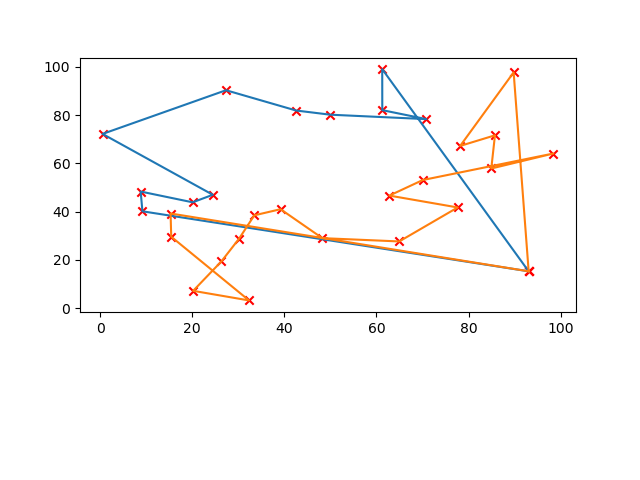

In [19]:
print_path(points,sol)

Text(0, 0.5, 'taille du chemin')

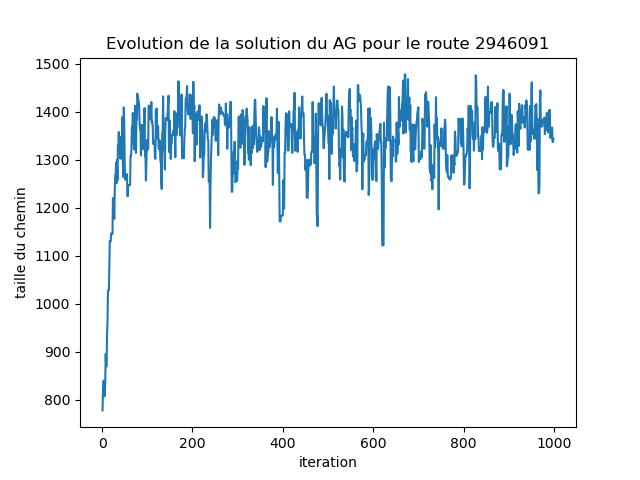

In [20]:
energy_fig, energy_ax = plt.subplots()
energy_ax.plot(list(range(len(history['best_fitness']))),[-x for x in history['best_fitness']])
energy_ax.set_title(f"Evolution de la solution du AG pour le route {routes[0]}")
energy_ax.set_xlabel("iteration")
energy_ax.set_ylabel("taille du chemin")